In [1]:
import tensorflow as tf
tf.config.optimizer.set_jit(False)
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.0


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Architecture of a Neural Network Regression
1. input layer shape
2. hidden layers
3. neurons per hidden layer
4. output layer shape
5. hidden activation
6. output activation
7. loss function - MSE (mean square error), MAE (mean absolute error)
8. optimizer

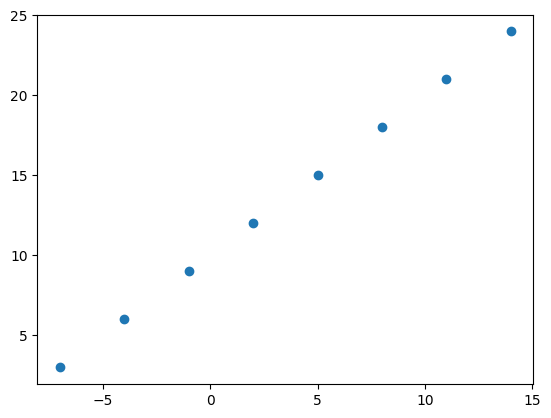

In [3]:
# Create features
X = tf.range(-7, 15, dtype=tf.float32, delta=3)
# Create labelsabs
y = tf.range(3, 25, dtype=tf.float32, delta=3)

# Visualize it

plt.scatter(X, y)

In [5]:
y == X + 10

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

In [6]:
# Input and output shape
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape # The reason for getting empty shape is we are providing scalar to predict a scalar

(TensorShape([]), TensorShape([]))

In [8]:
X[0].ndim, y[0].ndim

(0, 0)

In [9]:
# ## OLD
# # Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
 
# ## New
# # Fit the model
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line

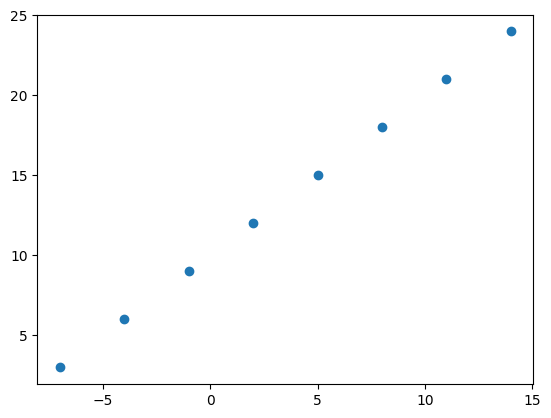

In [10]:
plt.scatter(X, y)

# Steps in modelling with TensorFlow

1. Creating a model - Define the input and output layers, as well as the hidden layers of a deep learning model
2. Compiling a model - Define the loss function (the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it learning) and evaluation metrics (what we can use to interpret the performance of our mode)
3. Fitting the model - letting the model try to fin patterns between X & y (features and labels)

In [12]:
# Set random sreversed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    # tf.keras.layers.Dense(1),
    # tf.keras.layers.Dense(1),
    # tf.keras.layers.Dense(1)
])

# 2. Compile the mmodel
model.compile(loss=tf.keras.losses.mae, # mean absolute error
             optimizer= tf.keras.optimizers.SGD(), # "sgd", # Stochastic Gradient Descent
             metrics=["mae", "accuracy", "mse"])

# Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 205ms/step - loss: 16.6207 - mae: 16.6207 - accuracy: 0.0000e+00 - mse: 401.1890
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 16.3395 - mae: 16.3395 - accuracy: 0.0000e+00 - mse: 386.5859
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 16.0582 - mae: 16.0582 - accuracy: 0.0000e+00 - mse: 372.3165
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 15.7770 - mae: 15.7770 - accuracy: 0.0000e+00 - mse: 358.3807
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 15.4957 - mae: 15.4957 - accuracy: 0.0000e+00 - mse: 344.7785


In [13]:
model.predict(tf.constant([17.0, 20.0]))

1/1 [==============================] - 0s 32ms/step


array([[-8.033756],
       [-9.458096]], dtype=float32)

# How to improve the model
We can improve our model by altering the steps we took to create a model

1. **Creating a model** - 1. Add more layers 2. Increase the number of hidden units(neurons) within each hidden layers 3. Change **activation function** of each layer
2. **Compiling a model** - 1. Change **optimization function** or **learning rate** of the optimization function
3. **Fitting a model** - 1. Change **epochs** 2. Provide more training data

**Start with a small model and scale to a larger model**

In [14]:
# Create a mmodel

model = tf.keras.Sequential([
    # tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"), 
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 

model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae", "mse"]
             )

# Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 460ms/step - loss: 13.3528 - mae: 13.3528 - mse: 225.0773
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.5221 - mae: 12.5221 - mse: 199.7057
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.6960 - mae: 11.6960 - mse: 176.2507
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9093 - mae: 10.9093 - mse: 154.9057
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.3231 - mae: 10.3231 - mse: 135.4086
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.7148 - mae: 9.7148 - mse: 117.0894
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 9.0939 - mae: 9.0939 - mse: 100.2218
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 8.4509 - mae: 8.4509 - mse: 84.5923
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.7841 - mae: 7.7841 - mse: 70.2595
Epoch 10/100
1/1

In [15]:
model.predict(tf.constant([17.0, 20.0]))

1/1 [==============================] - 0s 27ms/step


array([[27.088701],
       [30.245293]], dtype=float32)

In [17]:
model.evaluate(X, y)

1/1 [==============================] - 0s 27ms/step - loss: 0.1334 - mae: 0.1334 - mse: 0.0217


[0.13342589139938354, 0.13342589139938354, 0.021733157336711884]

In [20]:
import seaborn as sns